In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import pickle
import matplotlib.pyplot as plt

In [49]:
with open('M:/BSE_df/ASIANPAINT.BO.csv','rb') as file:
    df_AP = pickle.load(file)
df_AP.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,1165.550049,1140.000000,1160.0,1146.500000,21776.0,1122.931519
2018-01-02,1149.400024,1134.949951,1145.0,1142.849976,22009.0,1119.356445
2018-01-03,1150.000000,1136.000000,1150.0,1141.099976,636697.0,1117.642578
2018-01-04,1178.699951,1148.199951,1149.5,1172.050049,75615.0,1147.956421
2018-01-05,1191.000000,1168.550049,1172.0,1183.750000,58612.0,1159.415771


In [29]:
shortma = df_AP['Adj Close'].ewm(span=12).mean()
longma = df_AP['Adj Close'].ewm(span=26).mean()

In [30]:
osci = shortma - longma
MACD = osci.ewm(span=9).mean()

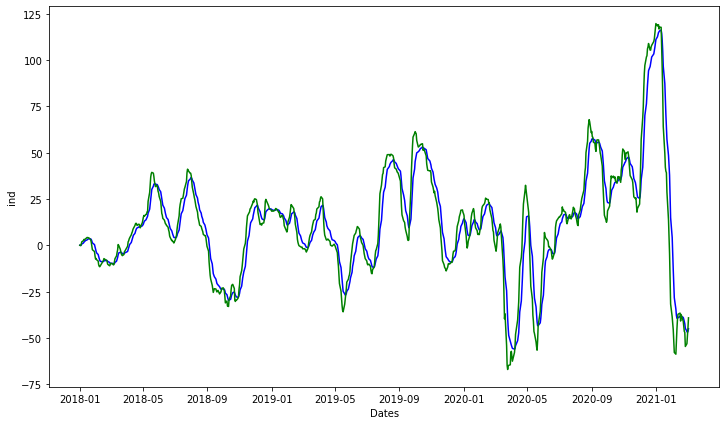

In [31]:
plt.figure(figsize=(12,7))
plt.plot(df_AP.index,MACD,color='blue')
plt.plot(df_AP.index,osci,color='green')
plt.xlabel('Dates')
plt.ylabel('ind')
plt.show()

In [61]:
def buy_sell(df):
    rs = 200000
    buy_list = []
    sell_list = []
    no_share = 0
    num = []
    flag = 0
    for i in range(len(MACD)-1):
        if rs > 0:
            if MACD[i] > osci[i] and flag != 0 :
                sell_list.append(df_AP['Adj Close'][i])
                buy_list.append(np.nan)
                no_share = 0
                rs = rs + df_AP['Adj Close'][i]
                flag = 0
               
              
            elif MACD[i] < osci[i] and flag != 1 :  
                buy_list.append(df_AP['Adj Close'][i])
                sell_list.append(np.nan)
                no_share = int(rs/df_AP['Adj Close'][i])
                rs = rs - df_AP['Adj Close'][i]
                num.append(no_share)
                flag = 1
                
            else:
                buy_list.append(np.nan)
                sell_list.append(np.nan)
                rs = rs
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
    return buy_list, sell_list ,num 

In [52]:
df_AP = df_AP.iloc[:-1] 

In [62]:
df_AP['buy_price'] = buy_sell(df_AP)[0]
df_AP['sell_price'] = buy_sell(df_AP)[1]
num = buy_sell(df_AP)[2]


c:\users\miksh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\miksh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
df_AP.head()

,High,Low,Open,Close,Volume,Adj Close,buy_price,sell_price
Date,,,,,,,,
2018-01-01,1165.550049,1140.000000,1160.0,1146.500000,21776.0,1122.931519,NaN,NaN
2018-01-02,1149.400024,1134.949951,1145.0,1142.849976,22009.0,1119.356445,NaN,NaN
2018-01-03,1150.000000,1136.000000,1150.0,1141.099976,636697.0,1117.642578,NaN,NaN
2018-01-04,1178.699951,1148.199951,1149.5,1172.050049,75615.0,1147.956421,1147.956421,NaN
2018-01-05,1191.000000,1168.550049,1172.0,1183.750000,58612.0,1159.415771,NaN,NaN


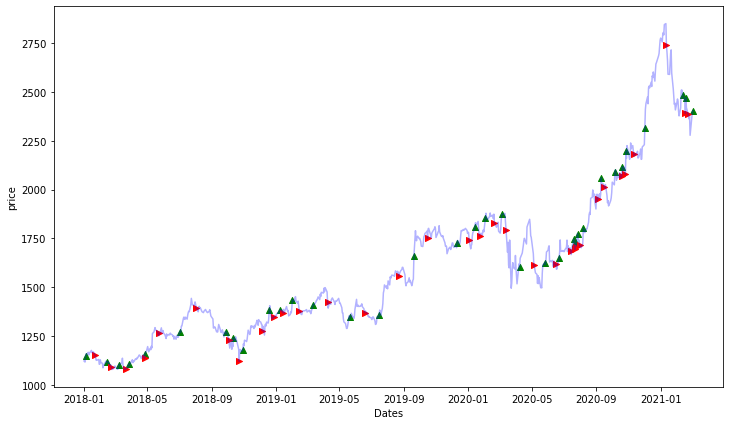

In [64]:
plt.figure(figsize=(12,7))
plt.plot(df_AP.index,df_AP['Adj Close'],color='blue',alpha = 0.3)
plt.scatter(df_AP.index,df_AP['buy_price'],color='green', marker = '^', alpha = 1)
plt.scatter(df_AP.index,df_AP['sell_price'],color='red', marker = '>', alpha = 1)
plt.xlabel('Dates')
plt.ylabel('price')
plt.show()

In [65]:
buy = pd.Series(buy_sell(df_AP)[0])
selll =  pd.Series(buy_sell(df_AP)[1])
buy.dropna(inplace=True)
selll.dropna(inplace=True)

In [69]:
profit = 0
for i in range(len(selll)):
    profit = profit + (selll.values[i] - buy.values[i])*num[i]
print(profit)

58458.412353515625
